Tobias based implementation of MoE

In [3]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import optax #Gradient processing and optimization in JAX

In [5]:
def quadratic(x, parameters):
  return parameters[0] * x**2 + parameters[1] * x + parameters[2]

def loss(parameters, gt_parameters):
  x_train = jax.random.uniform(jax.random.PRNGKey(0), 100)
  y_train = jax.vmap(quadratic, in_axes=(0, None))(x_train, gt_parameters)
  y_predicted = jax.vmap(quadratic, in_axes=(0, None))(x_train, parameters)
  return jnp.mean((y_train-y_predicted) ** 2)

def single_loss(parameters, gt_parameters):
  return loss(parameters,gt_parameters)

def multi_loss(parameters, gt_parameters):
  losses = jax.vmap(loss, in_axes=(0,0))(parameters, gt_parameters)
  return jnp.mean(losses)

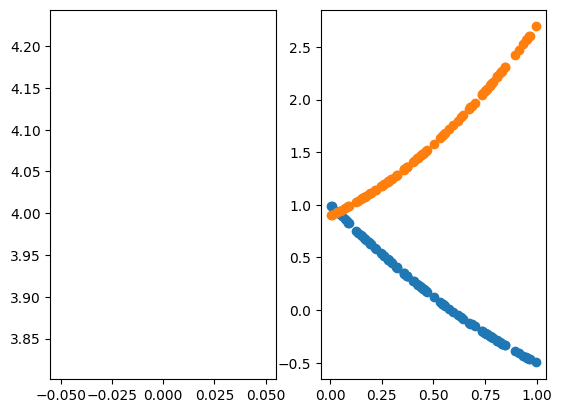

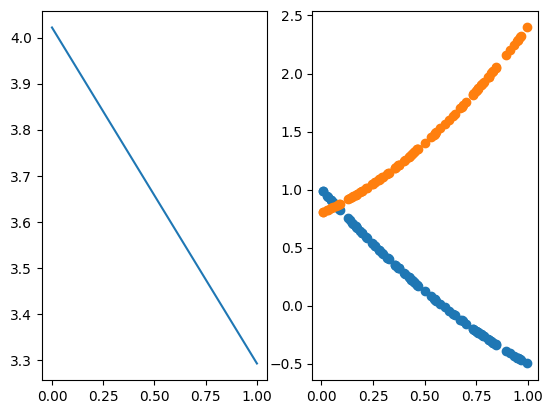

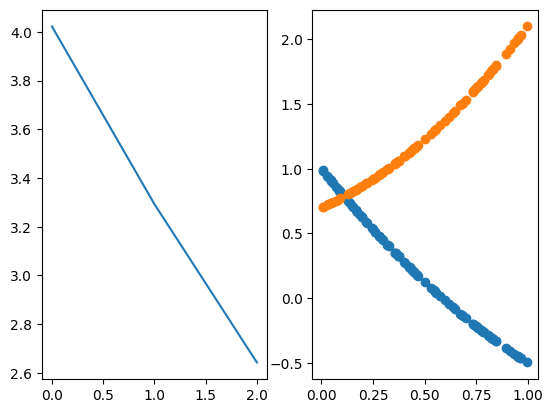

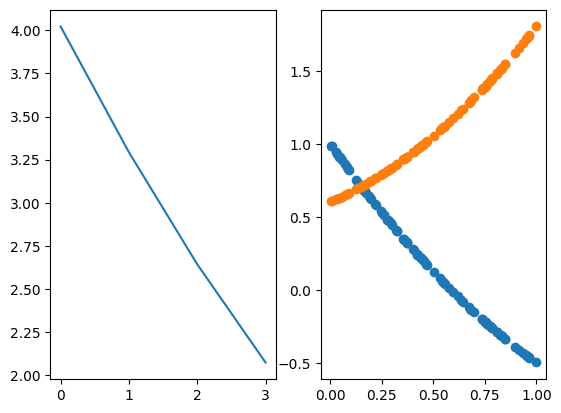

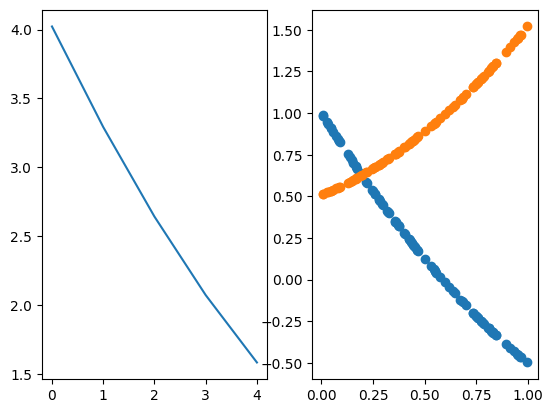

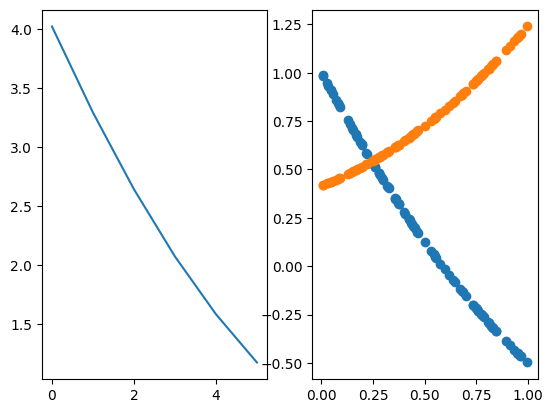

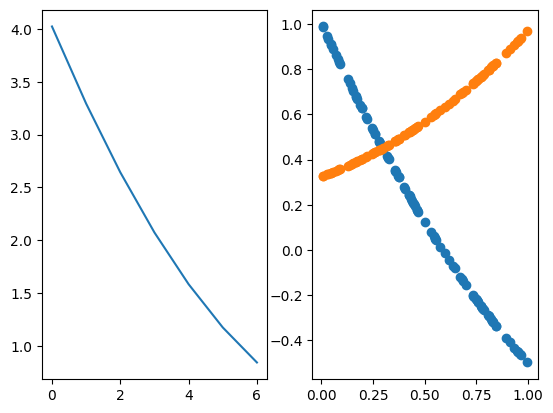

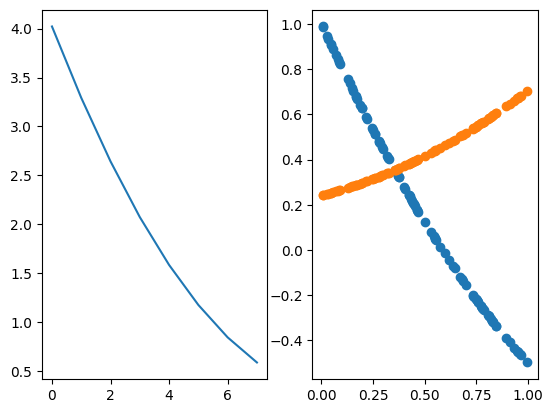

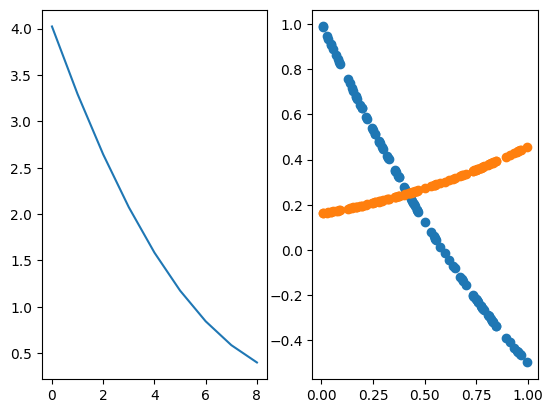

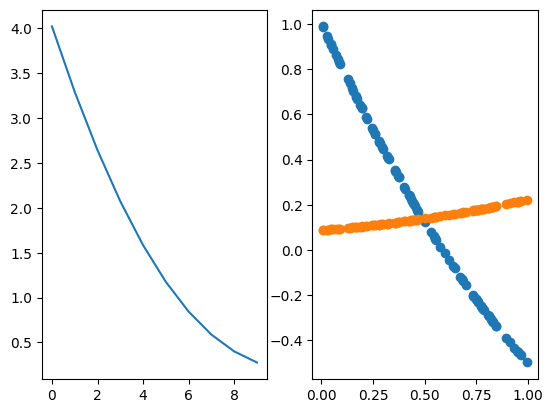

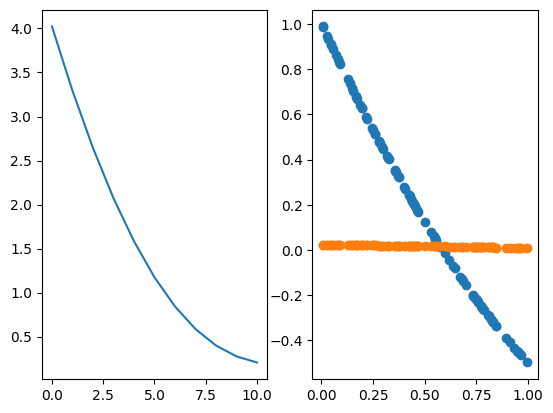

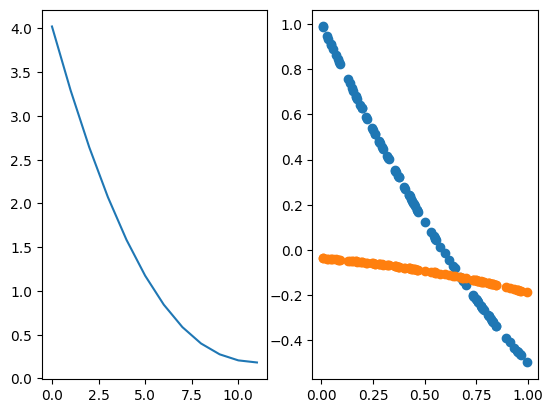

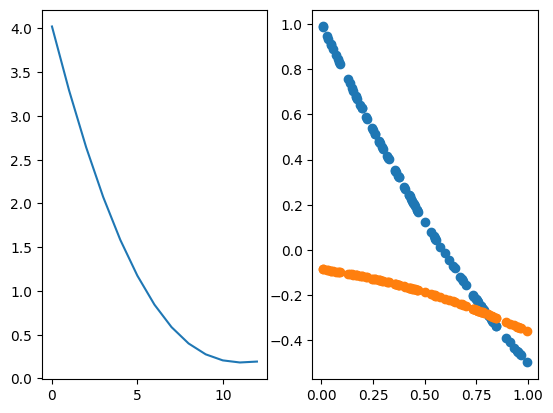

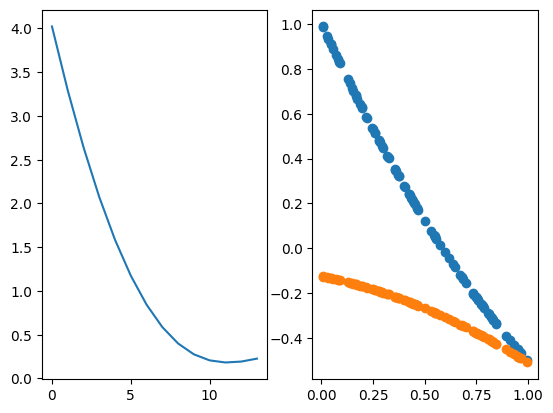

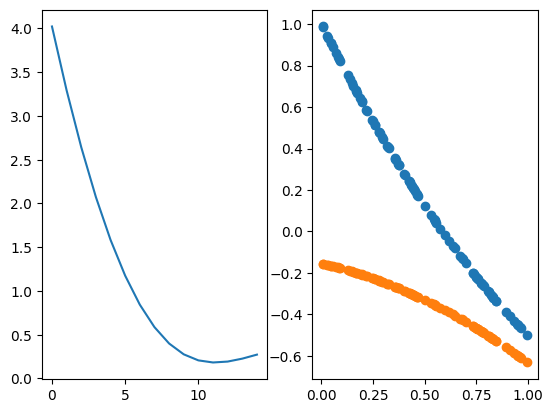

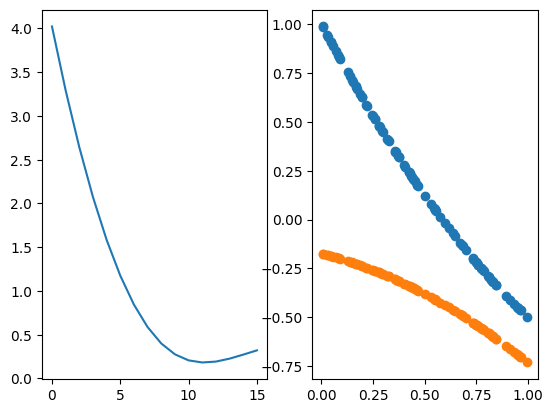

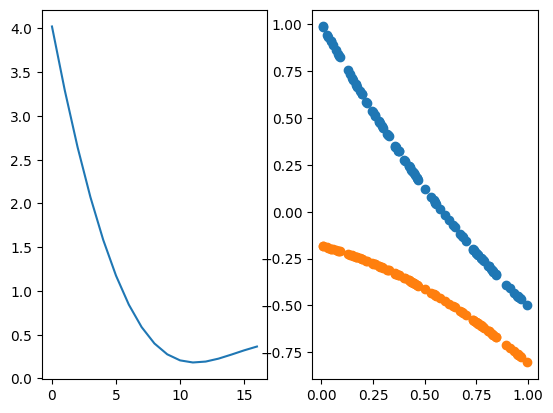

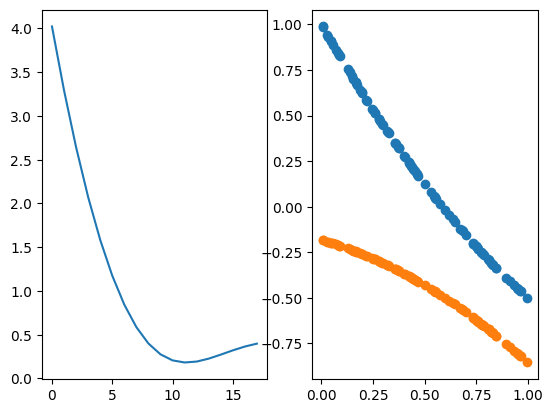

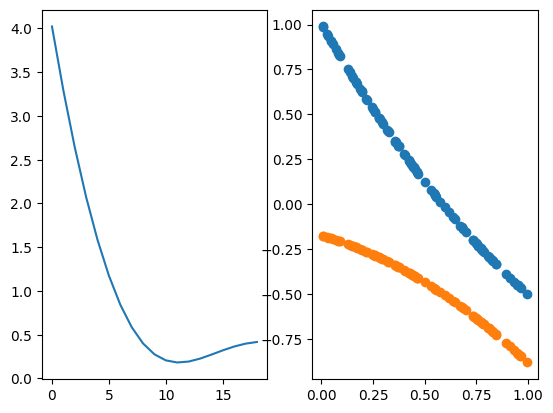

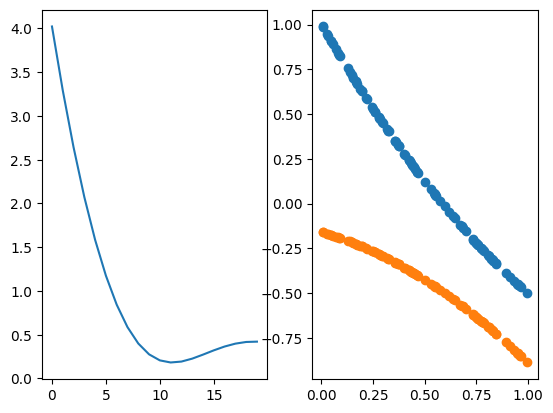

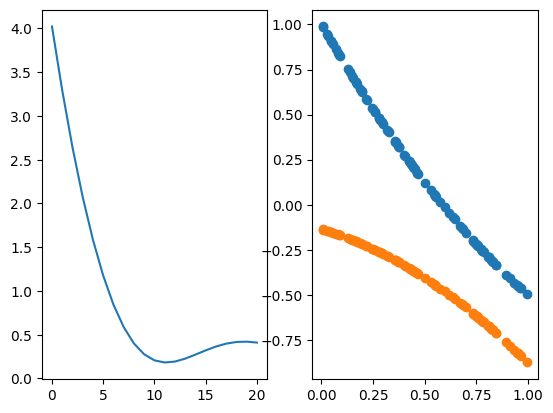

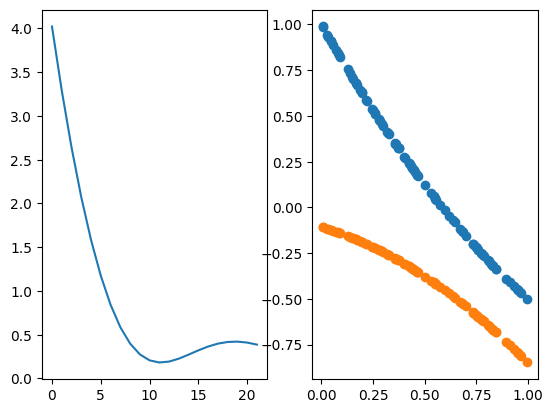

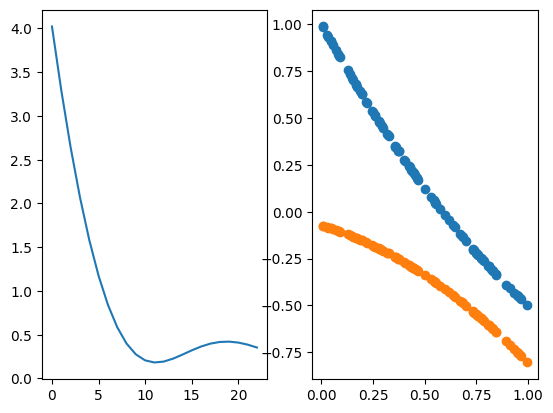

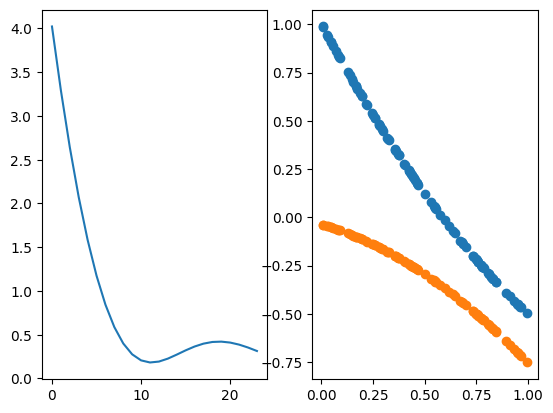

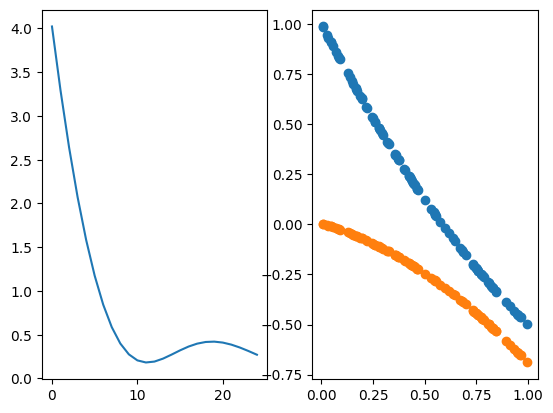

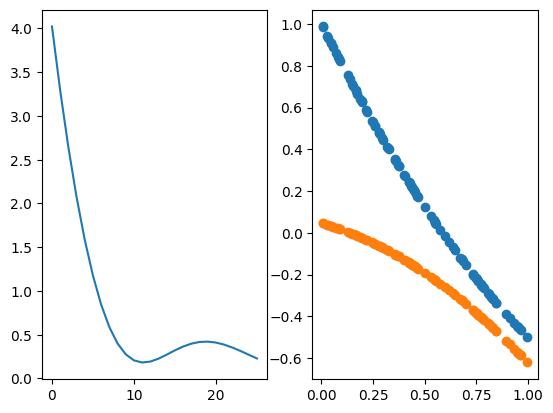

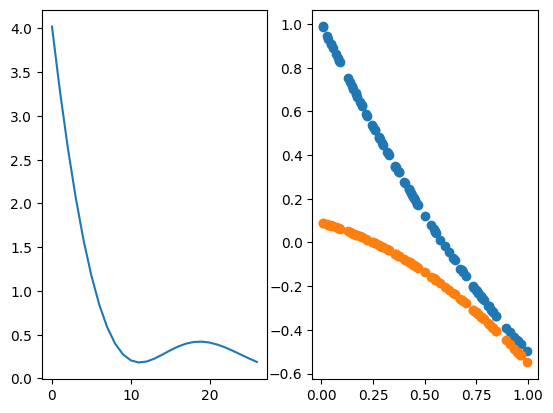

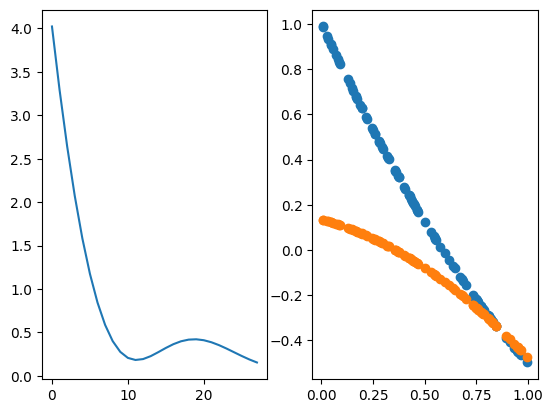

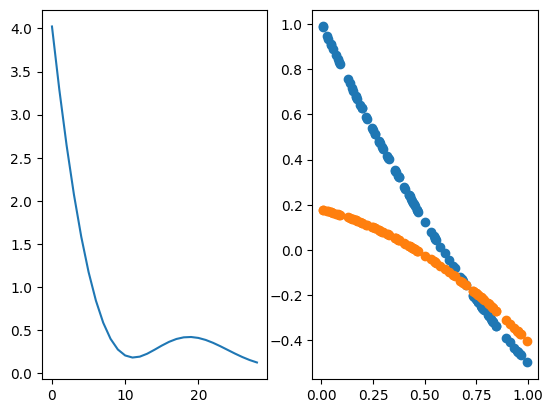

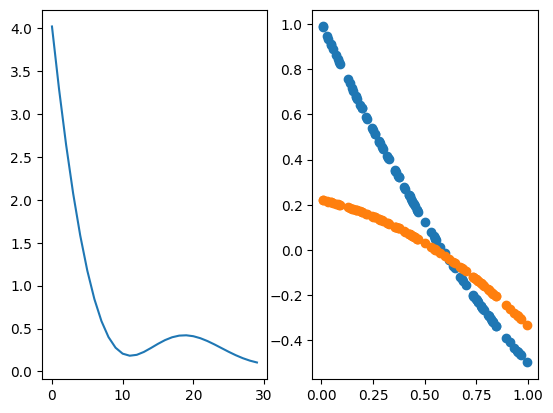

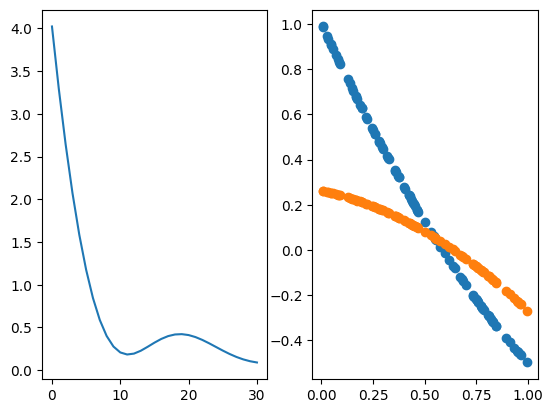

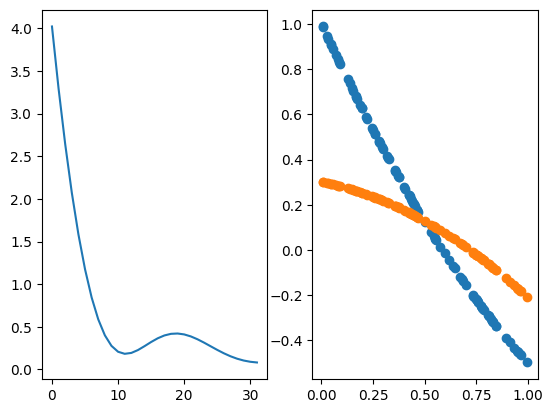

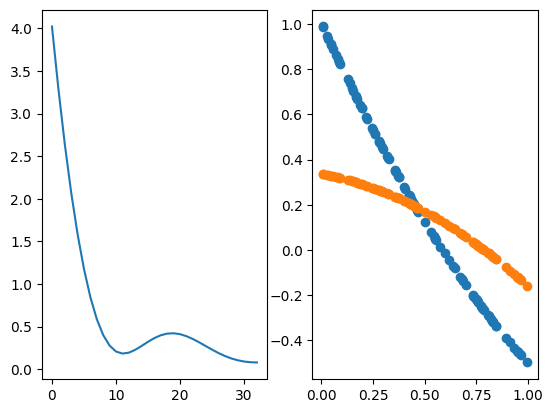

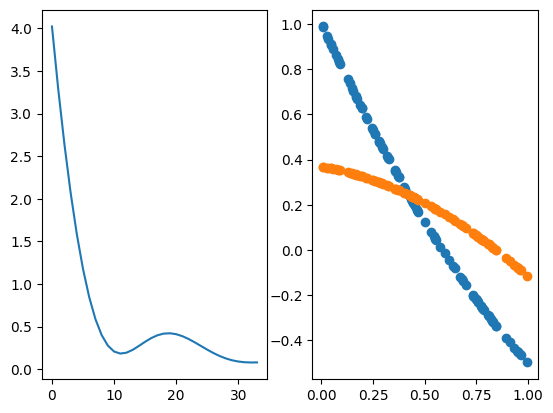

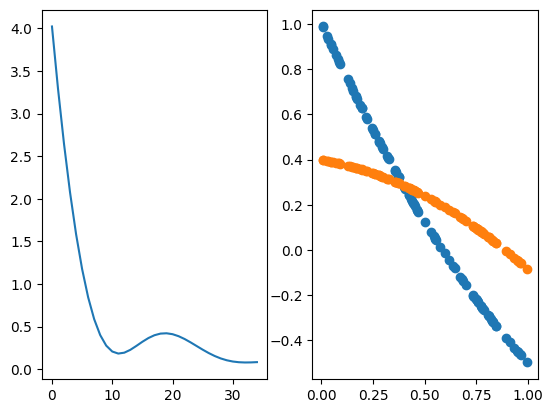

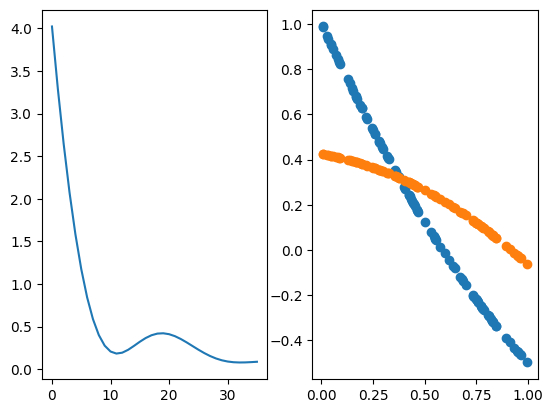

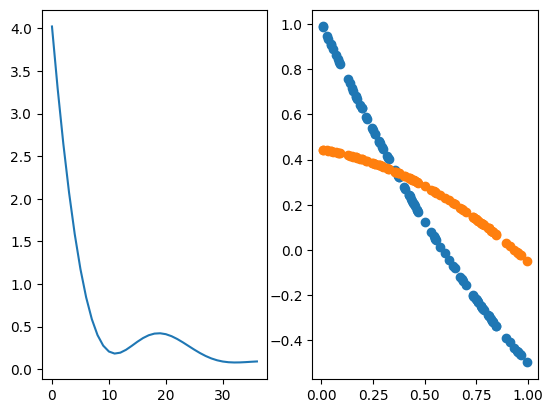

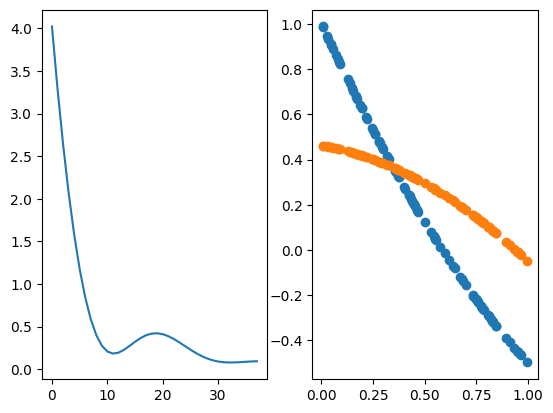

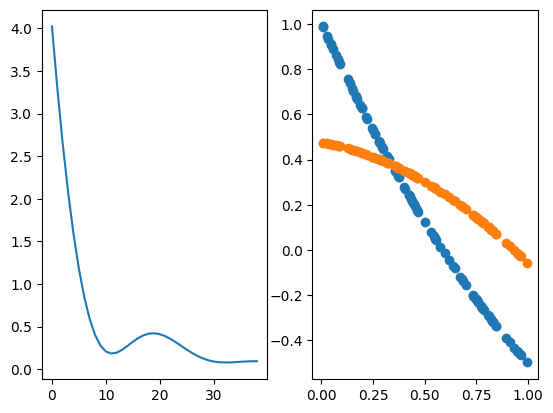

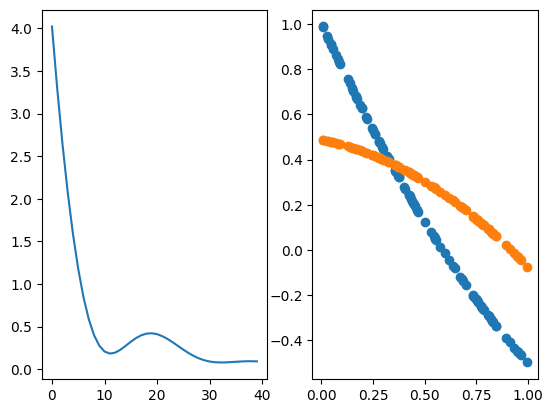

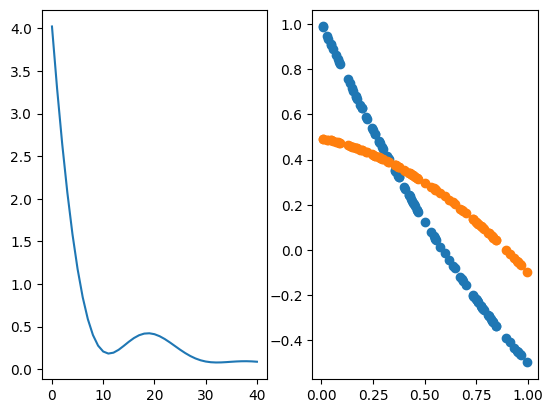

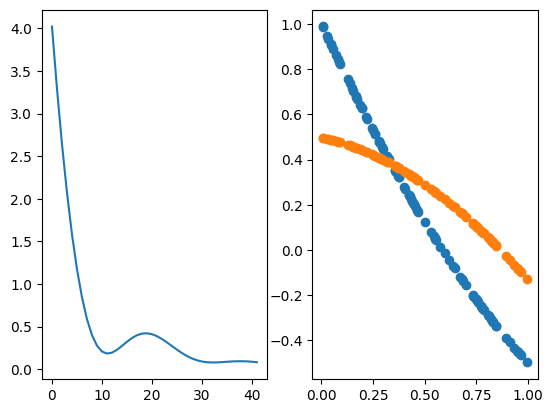

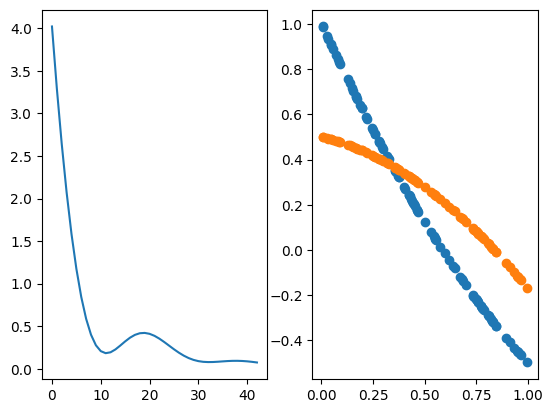

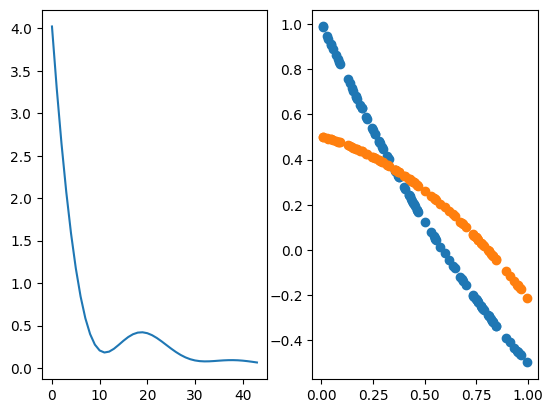

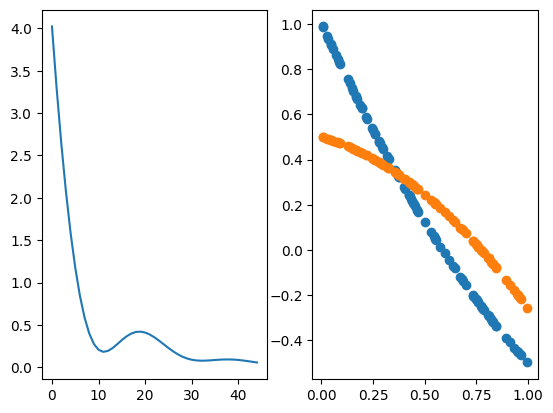

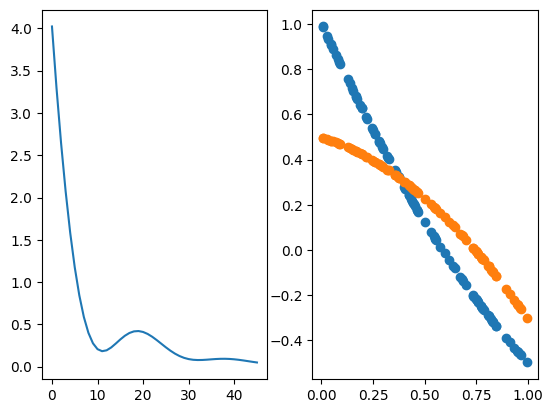

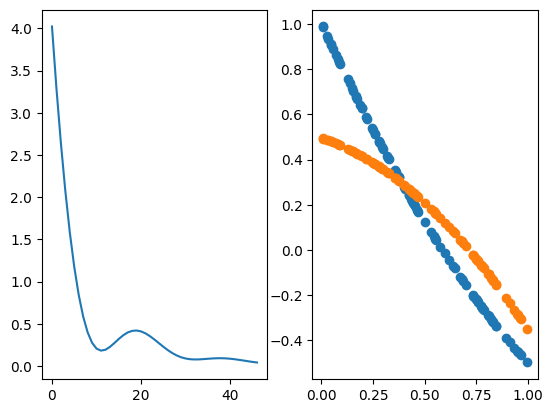

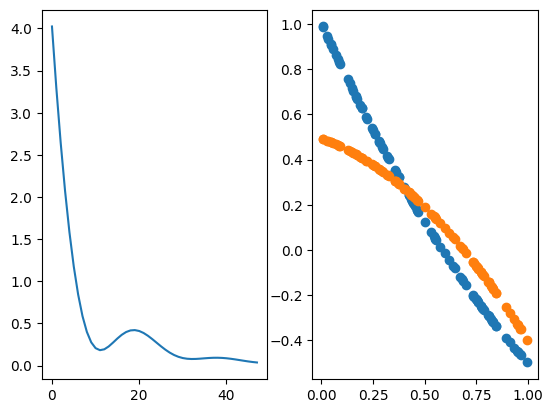

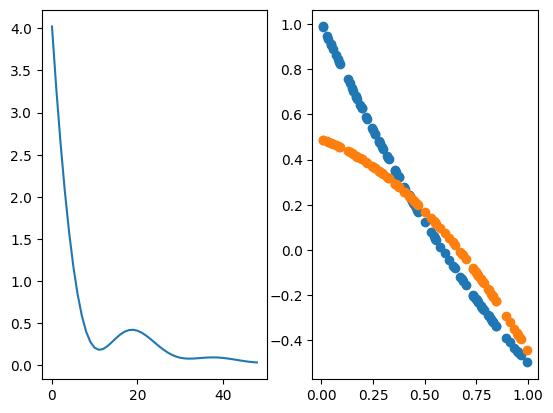

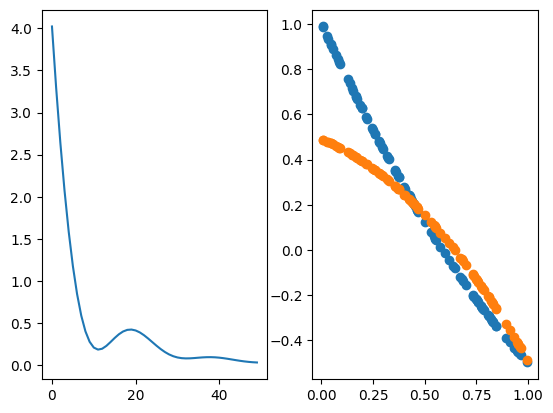

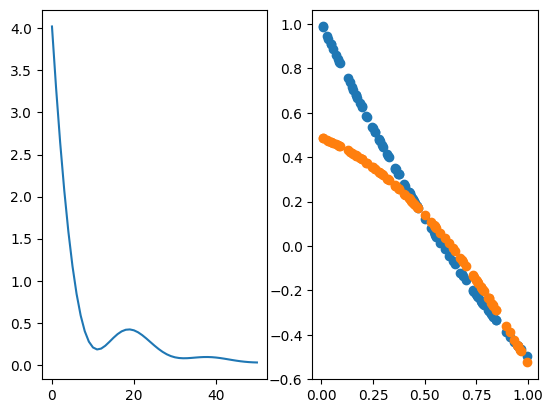

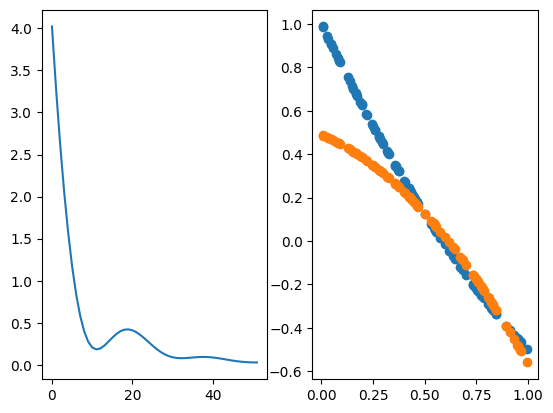

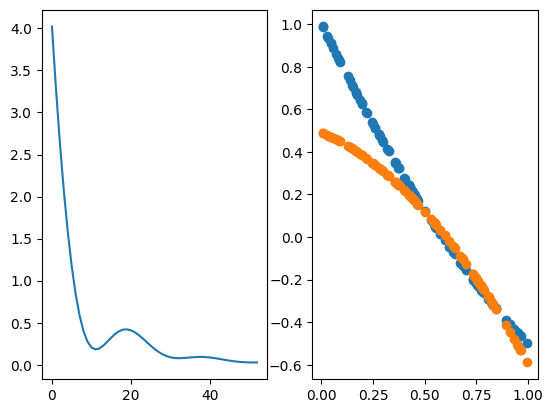

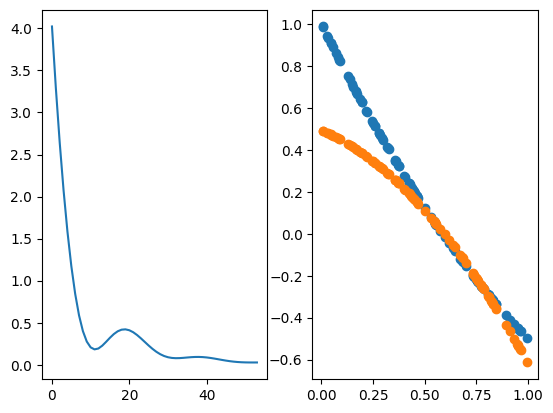

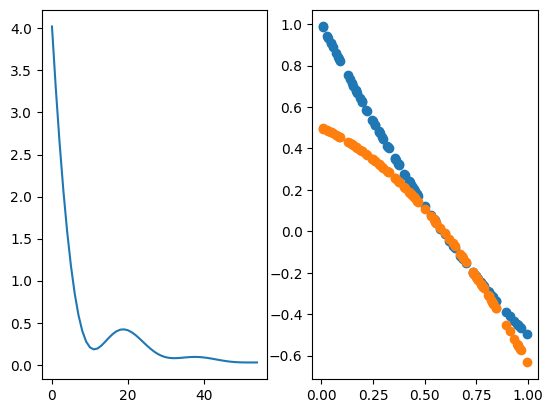

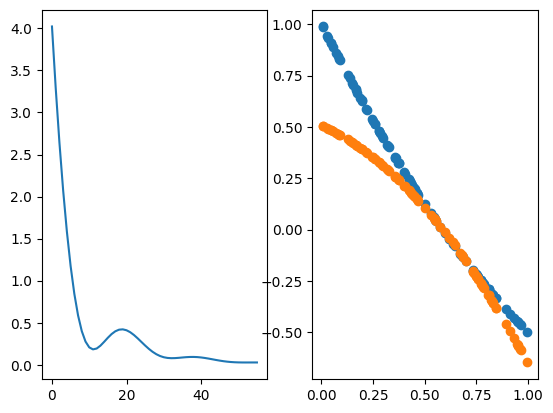

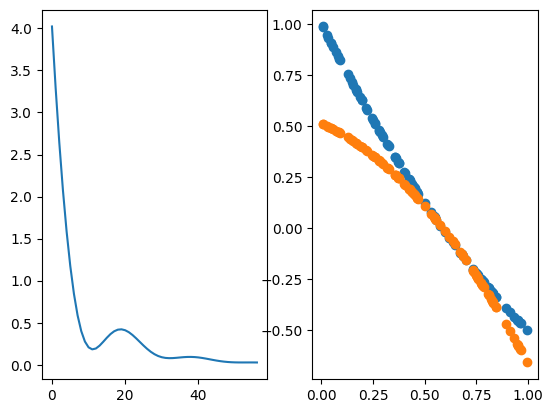

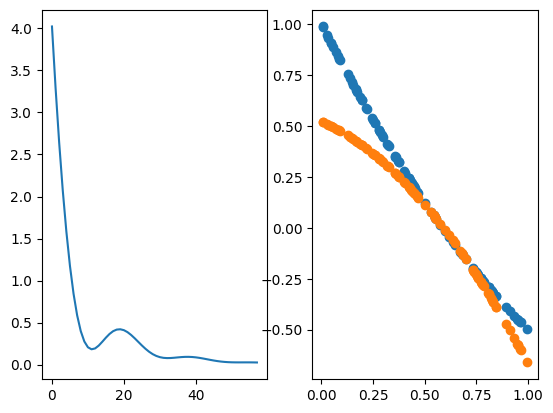

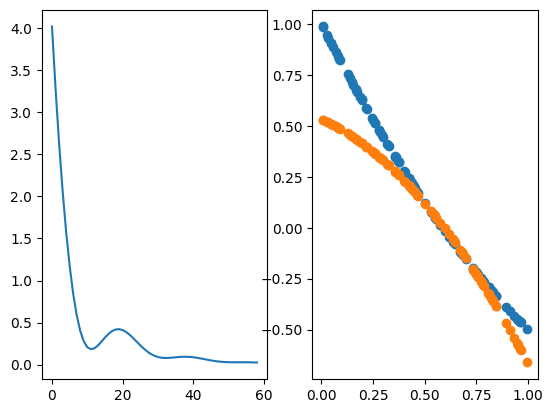

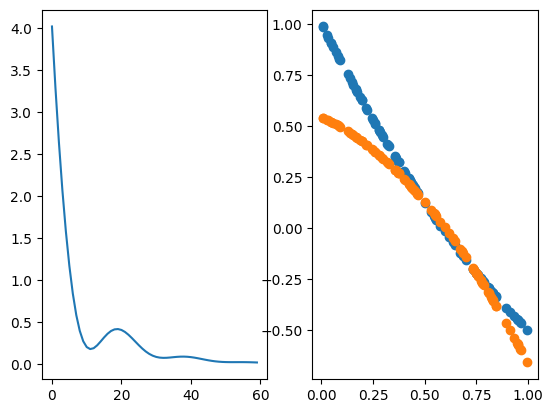

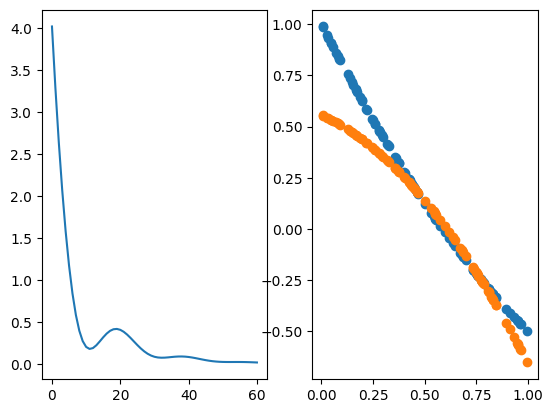

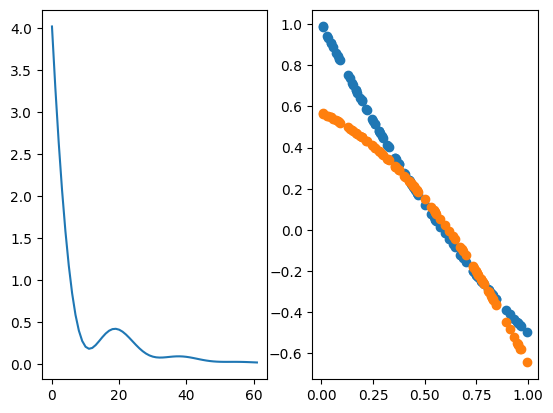

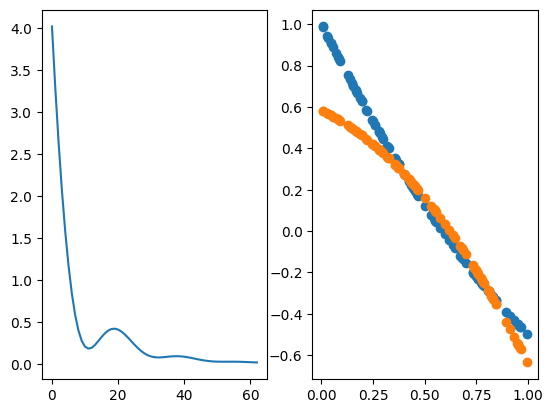

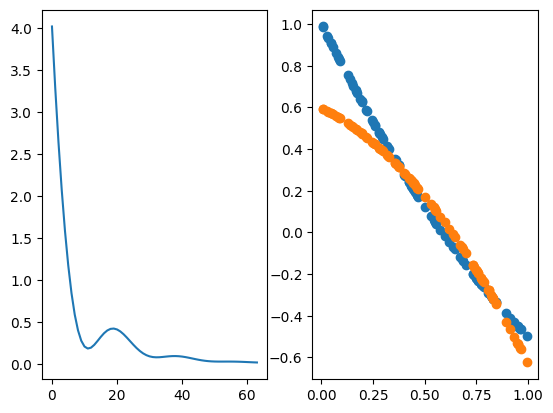

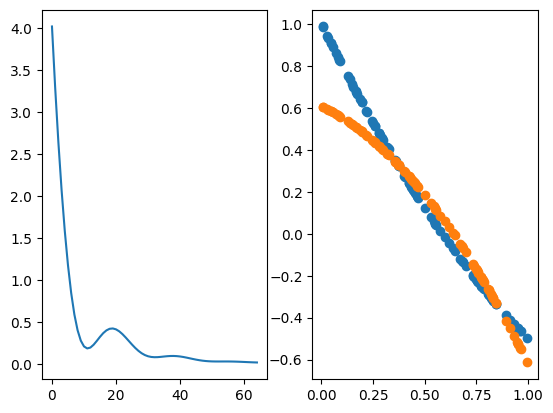

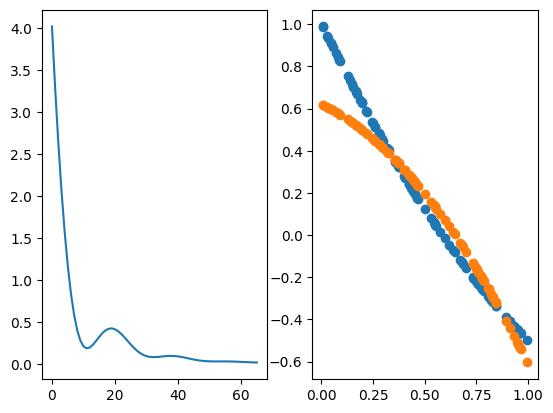

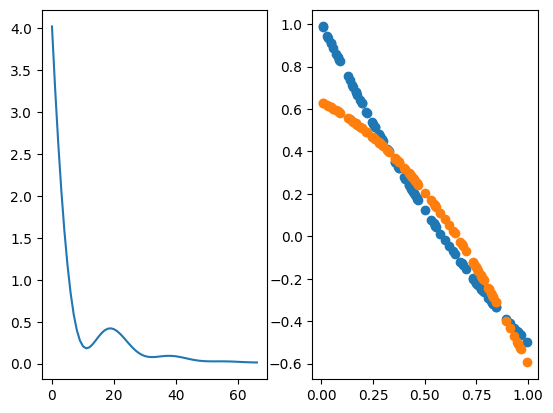

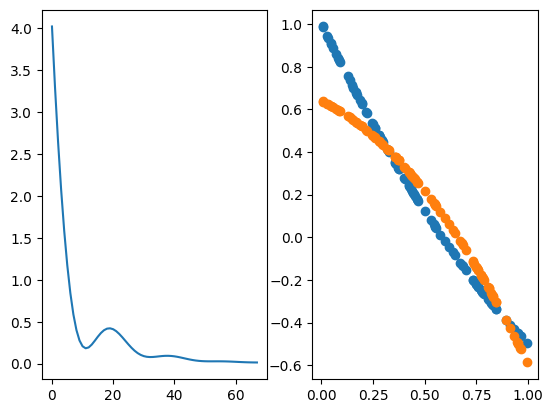

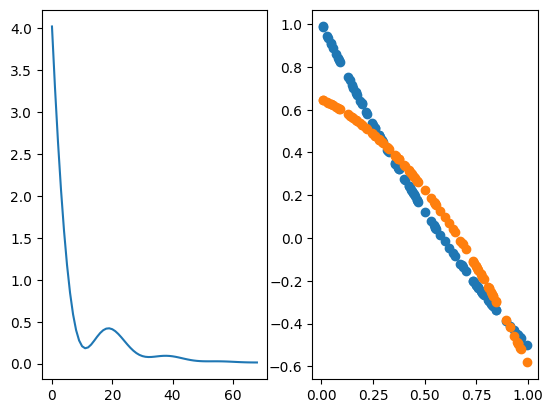

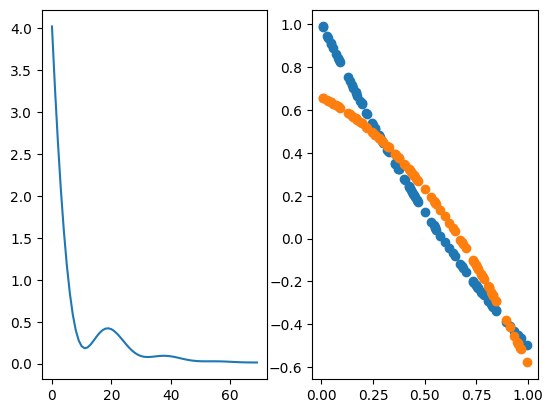

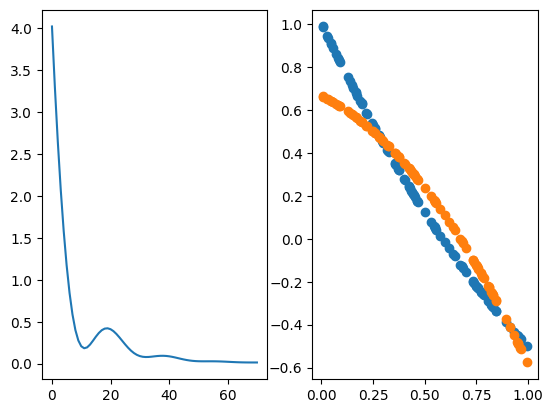

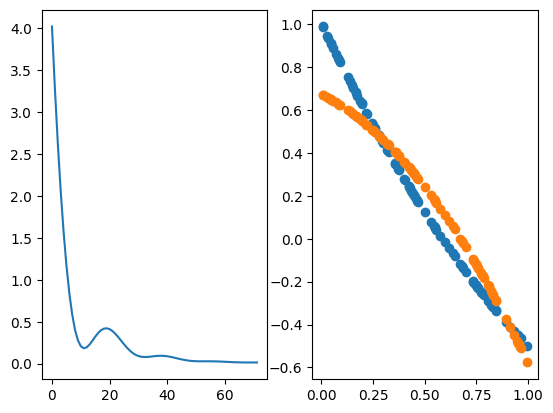

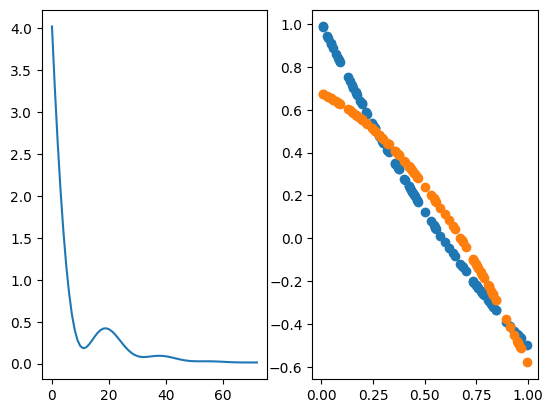

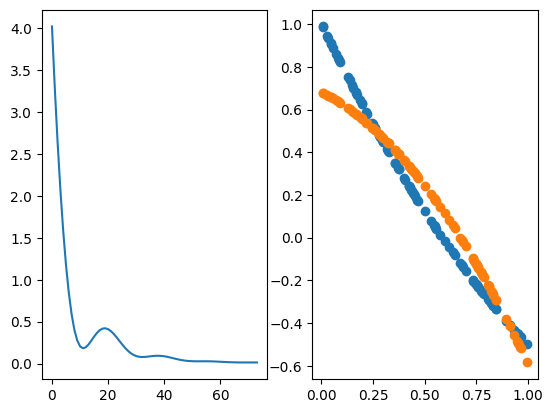

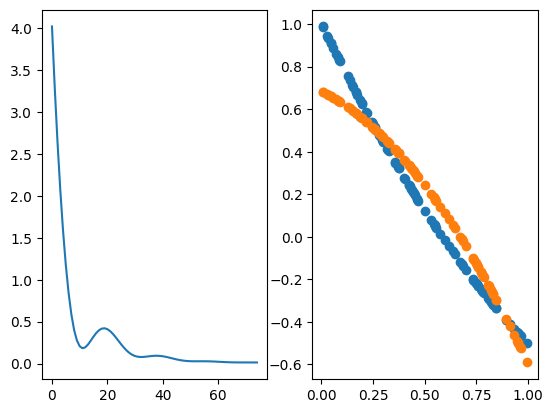

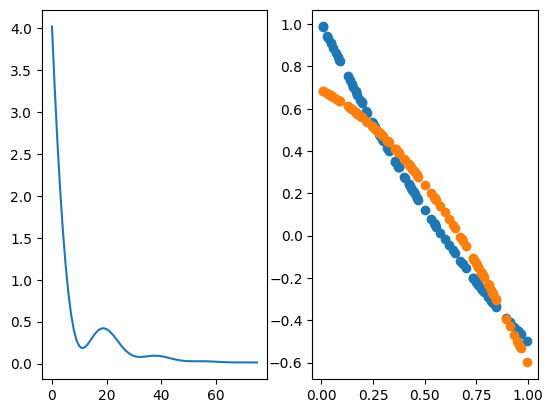

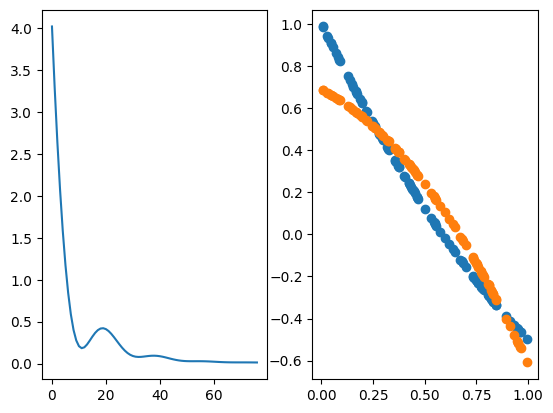

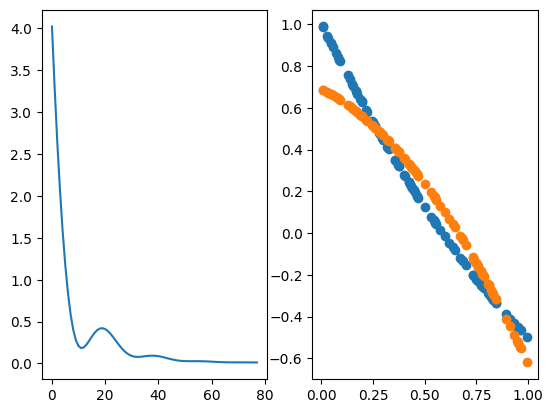

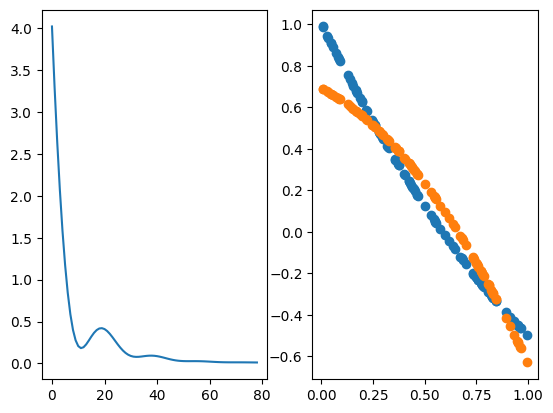

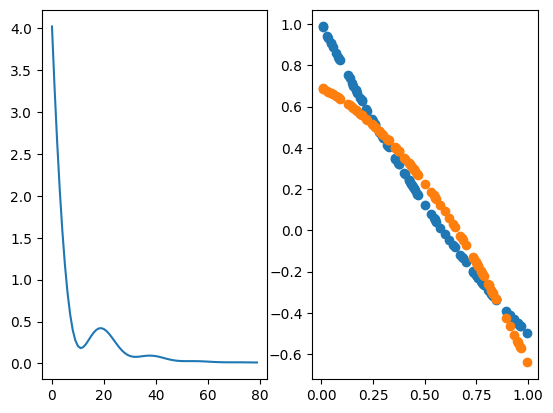

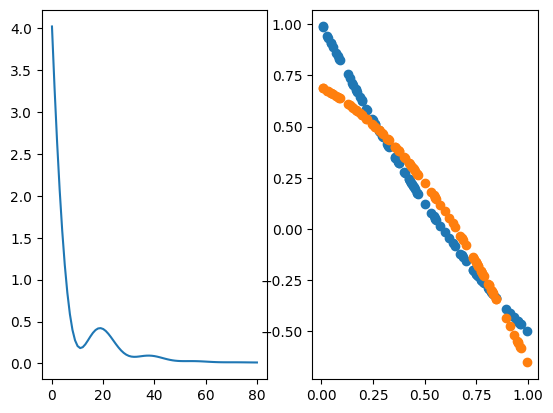

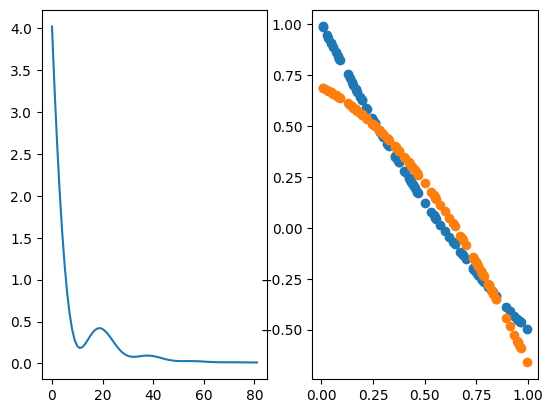

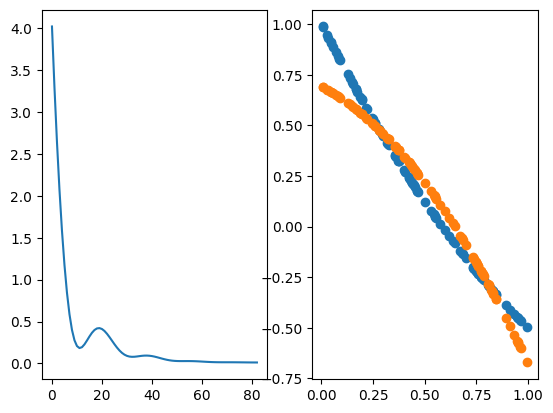

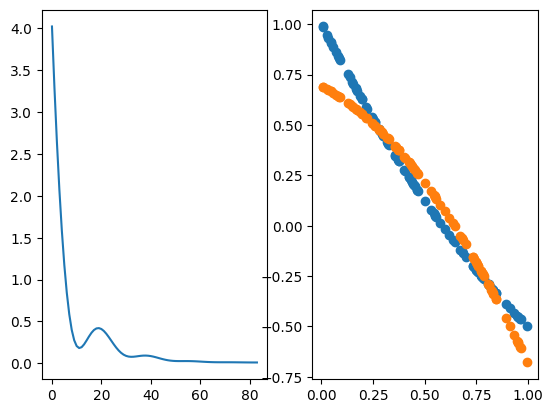

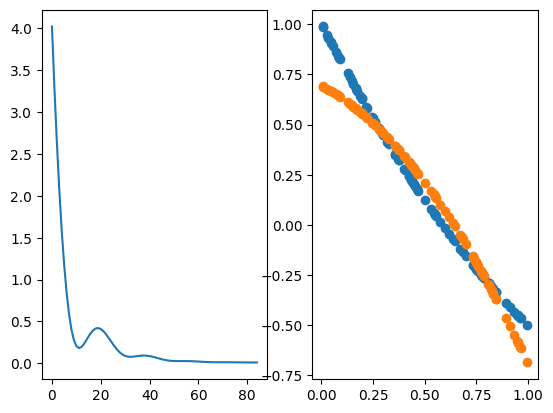

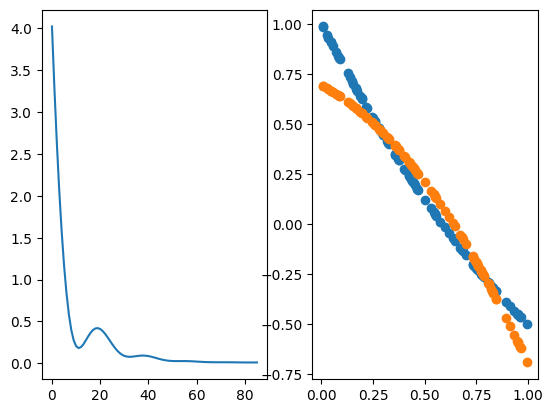

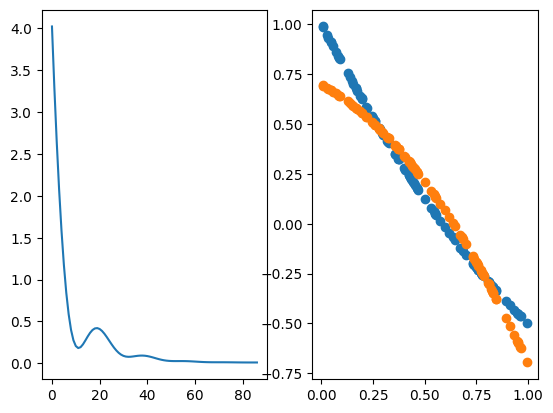

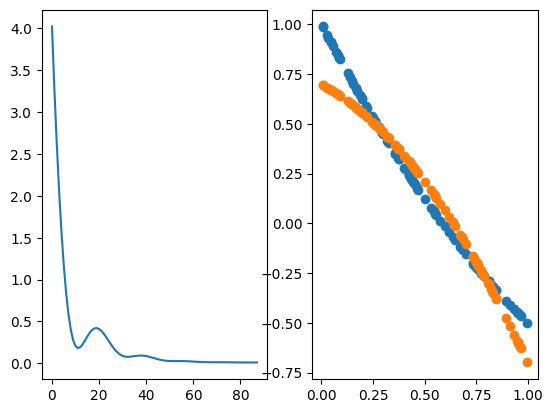

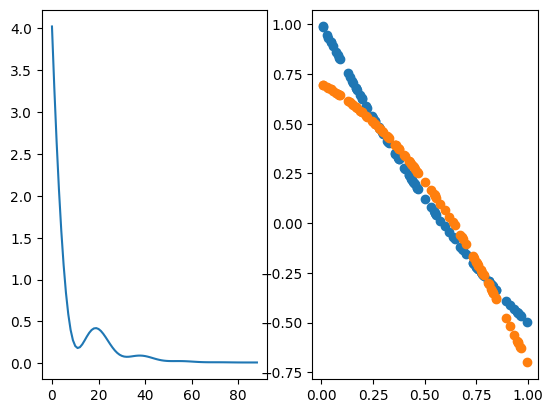

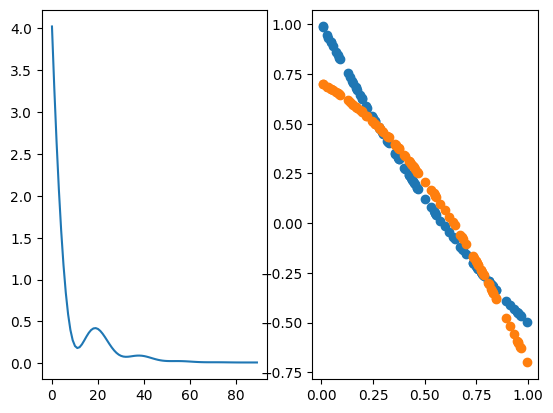

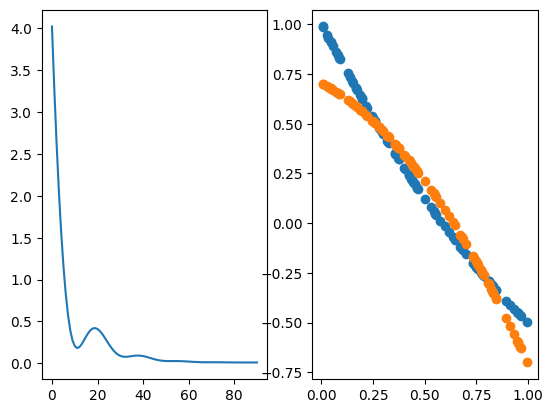

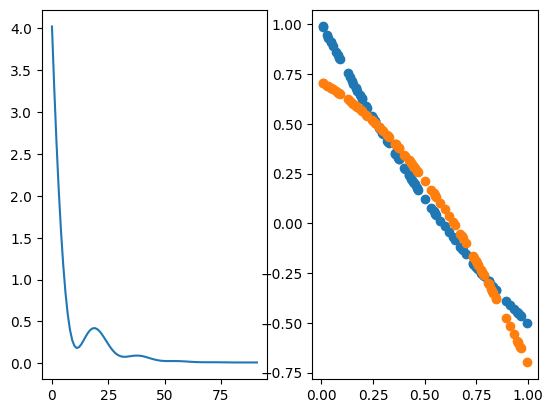

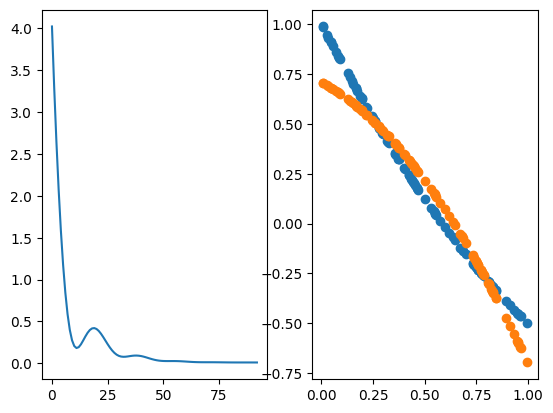

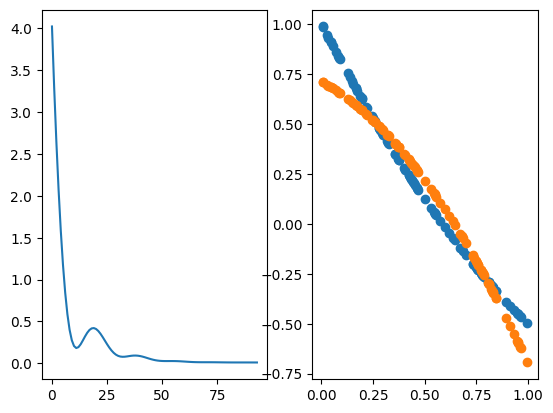

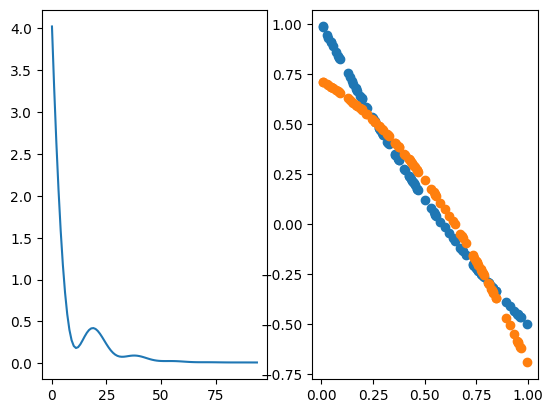

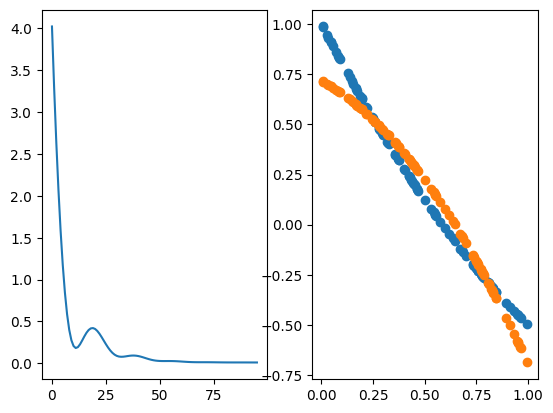

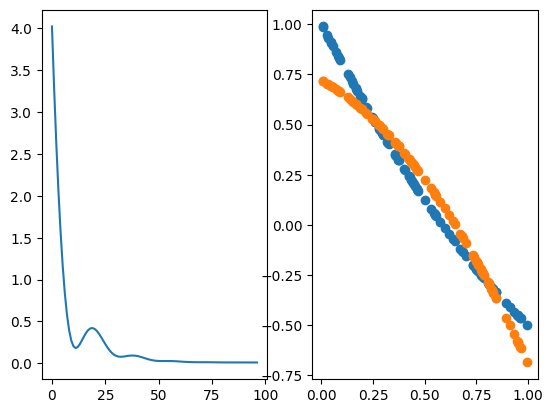

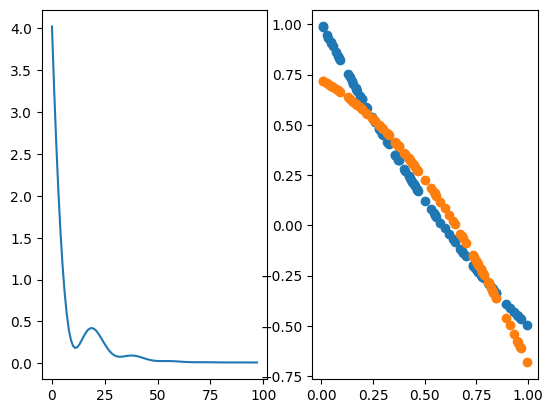

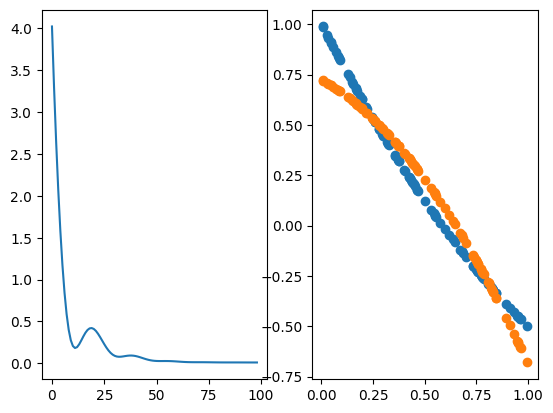

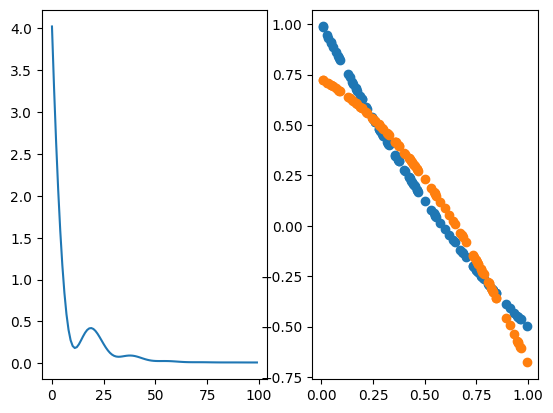

In [4]:
multi = False

# Initalize ground truth and model parameters
gt_parameters = jnp.array([[0.5, -2.0, 1.0], [0.75, -3.0, 2.0]]) if multi else jnp.array([0.5, -2.0, 1.0])
parameters = jnp.ones((2,3)) if multi else jnp.ones(3)

# Initalize model optimizer
optimizer = optax.adam(0.1)
opt_state = optimizer.init(parameters)

# Initalize result cache
losses = []

# Training
for i in range(0,100):
  loss_value, grads = jax.value_and_grad(multi_loss)(parameters, gt_parameters) if multi else jax.value_and_grad(single_loss)(parameters, gt_parameters)
  updates, opt_state = optimizer.update(grads, opt_state, parameters)
  parameters = optax.apply_updates(parameters, updates)
  losses.append(loss_value)

  # Plot results
  fig, axs = plt.subplots(1, 3 if multi else 2)
  axs[0].plot(losses)
  x_test = jax.random.uniform(jax.random.PRNGKey(1), 100)
  if multi:
    axs[1].scatter(x_test, quadratic(x_test, gt_parameters[0]))
    axs[1].scatter(x_test, quadratic(x_test, parameters[0]))
    axs[2].scatter(x_test, quadratic(x_test, gt_parameters[1]))
    axs[2].scatter(x_test, quadratic(x_test, parameters[1]))
  else:
    axs[1].scatter(x_test, quadratic(x_test, gt_parameters))
    axs[1].scatter(x_test, quadratic(x_test, parameters))
  plt.show()